# 1. Scrape text data from some selected articles from above link. You can use beautiful soup, newspapers or any data scraping libraries

In [1]:
# !pip install BeautifulSoup4
# !pip install newspaper3k
# !pip install pymongo
# !pip install nltk
# !pip install networkx
# !pip install spacy
# !pip install py2neo
# !pip install wordcloud
# !pip install pillow
# python -m spacy download en_core_web_sm

In [2]:
# Content of Home page

import requests
from bs4 import BeautifulSoup
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
from spacy.lang.en.stop_words import STOP_WORDS
import string
from collections import Counter
import nltk
from nltk.corpus import stopwords


C:\Users\FCT\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [51]:
# Step 1: Scraping text data from selected articles
def scrap_links():    
    url = "https://english.onlinekhabar.com/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

#     sections = soup.select("div.ok-news-post")[:3]
    sections = soup.select("div.ok-news-post")
    # print(sections)

    links = []

    for section in sections:
        section_detail = section.select_one("h2 a" )
    #     print(section_detail)
        link = section_detail.get('href')
    #     print(link)
        links.append(link)

    print(links)
    return links


def inside_content(links_list):
    global text, news_dict, text_list
    text = "" 
    news_dict = {"articles": {}}
    article_count = 1
    text_list = []
    

    for i in tqdm(links_list):   
#         print(len(i))
        response = requests.get(i)
        soup = BeautifulSoup(response.content, "html.parser")

        title = soup.select_one("h1").text
        author = soup.select_one("div.ok-author span").text 
        post_date = soup.select_one("span.ok-post-date").text
        category_elements = soup.select("nav.rank-math-breadcrumb p a")
        if category_elements:
            last_category_element = category_elements[-1]
            category = last_category_element.get('href').split("category/")[1] 
#             print(category)
        else:
            print("No category element found.")

        div_element = soup.find("div", class_="post-content-wrap")
        paragraphs = div_element.find_all("p")
        content = ""

        for paragraph in paragraphs:
            content = content + paragraph.get_text()
            
#         print(f"Author: {author}")
#         print(f"Date: {post_date}")
#         print(f"Title: {title}")
#         print(f"Content: {content}")

        article = ({
            "Link" : i,
            "Category" : category,
            "Author": author,
            "Date" : post_date,
            "Title" : title,
            "Content" : content
         })
        
        text = text + content
        text_list.append(content)
        
    
    
#         news_dict["articles"].append(article)
        news_dict["articles"][f"article{article_count}"] = article
    
        article_count += 1
        
        
inside_content(scrap_links())



['https://english.onlinekhabar.com/veda-software-school-management-nepal.html', 'https://english.onlinekhabar.com/ministry-of-women-no-women-leadership.html', 'https://english.onlinekhabar.com/neocolonialism-cost-nepali-economy.html', 'https://english.onlinekhabar.com/tim-watts-australia-minister-ktm.html', 'https://english.onlinekhabar.com/ang-tawa-sherpa-surrenders.html', 'https://english.onlinekhabar.com/ministry-of-women-no-women-leadership.html', 'https://english.onlinekhabar.com/neocolonialism-cost-nepali-economy.html', 'https://english.onlinekhabar.com/top-bahadur-rayamajhi-arrest-scam.html', 'https://english.onlinekhabar.com/swadeshi-make-in-nepal-summit-2023.html', 'https://english.onlinekhabar.com/jhapa-return-after-funeral.html', 'https://english.onlinekhabar.com/tim-watts-australia-minister-ktm.html', 'https://english.onlinekhabar.com/veda-software-school-management-nepal.html', 'https://english.onlinekhabar.com/ang-tawa-sherpa-surrenders.html', 'https://english.onlinekhaba

100%|██████████████████████████████████████████████████████████████████████████████████| 76/76 [01:16<00:00,  1.00s/it]


In [53]:
import json 
# Save the extracted information as a JSON file
with open("news_data_scrapped_ok.json", "w") as f:
    json.dump(news_dict, f, indent=4)

In [54]:
# print(news_dict)
print(text)
# print(text_list)

Schools in Nepal are always busy; many of them are even chaotic. There are students busy catching up with the syllabus of different subjects and teachers preparing for the classes, checking the papers and results. Talk to the people involved in school management, most of them tell you why the country’s school management system needs a revolution.There are over 30,000 schools in Nepal, and the majority of them are still undertaking the process manually. Students have to write long papers and teachers either take the copies home or stay back at school burning the midnight oil. Then, working parents, in particular, have a hard time checking their wards’ progress. Perhaps the sector awaits a digital revolution. Realising this, a team of young entrepreneurs have introduced Veda to many schools across the country.Now, with Veda, students and teachers save their time staying updated with the syllabus and grading the exams whereas parents have an easier way to stay updated with their children’

In [56]:
# Specify the file path and name
file_path = "news_text.txt"

# Open the file in write mode
with open(file_path, "w", encoding="utf-8") as file:
    # Write the string to the file
    file.write(text)


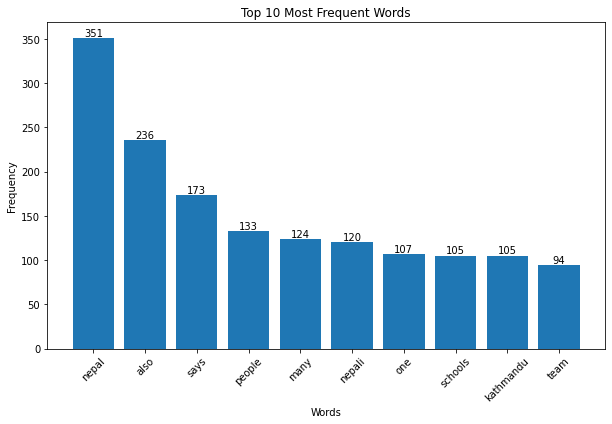

In [34]:
# Remove symbols and convert text to lowercase
clean_text = re.sub(r'[^\w\s]', '', text.lower())

# Split the text into words
words = clean_text.split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the top 10 most frequent words
top_words = word_counts.most_common(10)

# Extract the words and counts separately
top_words, word_counts = zip(*top_words)

# Create a bar plot of the top words with frequencies on top
plt.figure(figsize=(10, 6))
plt.bar(top_words, word_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)

# Add the frequency values on top of the bars
for i, count in enumerate(word_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


# (A) Dependancy Parsing Technique

In [35]:
import string

# Step 2: Applying necessary NLP processing
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Step 3: Extracting subject, object, and relationship from each sentence
edges = []
punctuations = string.punctuation  # Define the punctuation symbols to be removed

count = 0
for sent in doc.sents:
    count = count +1
    for token in sent:
        if token.text.lower() not in STOP_WORDS and token.text not in punctuations:        
            if token.dep_ == "nsubj" and token.head.pos_ == "VERB":
                subject = token.text
                for child in token.children:
                    if child.dep_ == "amod":
                        subject = child.text + " " + subject
                for child in token.head.children:
                    if child.dep_ == "dobj":
                        obj = child.text
                        for grandchild in child.children:
                            if grandchild.dep_ == "amod":
                                obj = grandchild.text + " " + obj
                        edges.append((subject, obj, token.head.text))

print(count)                        
print(len(edges))

2343
765


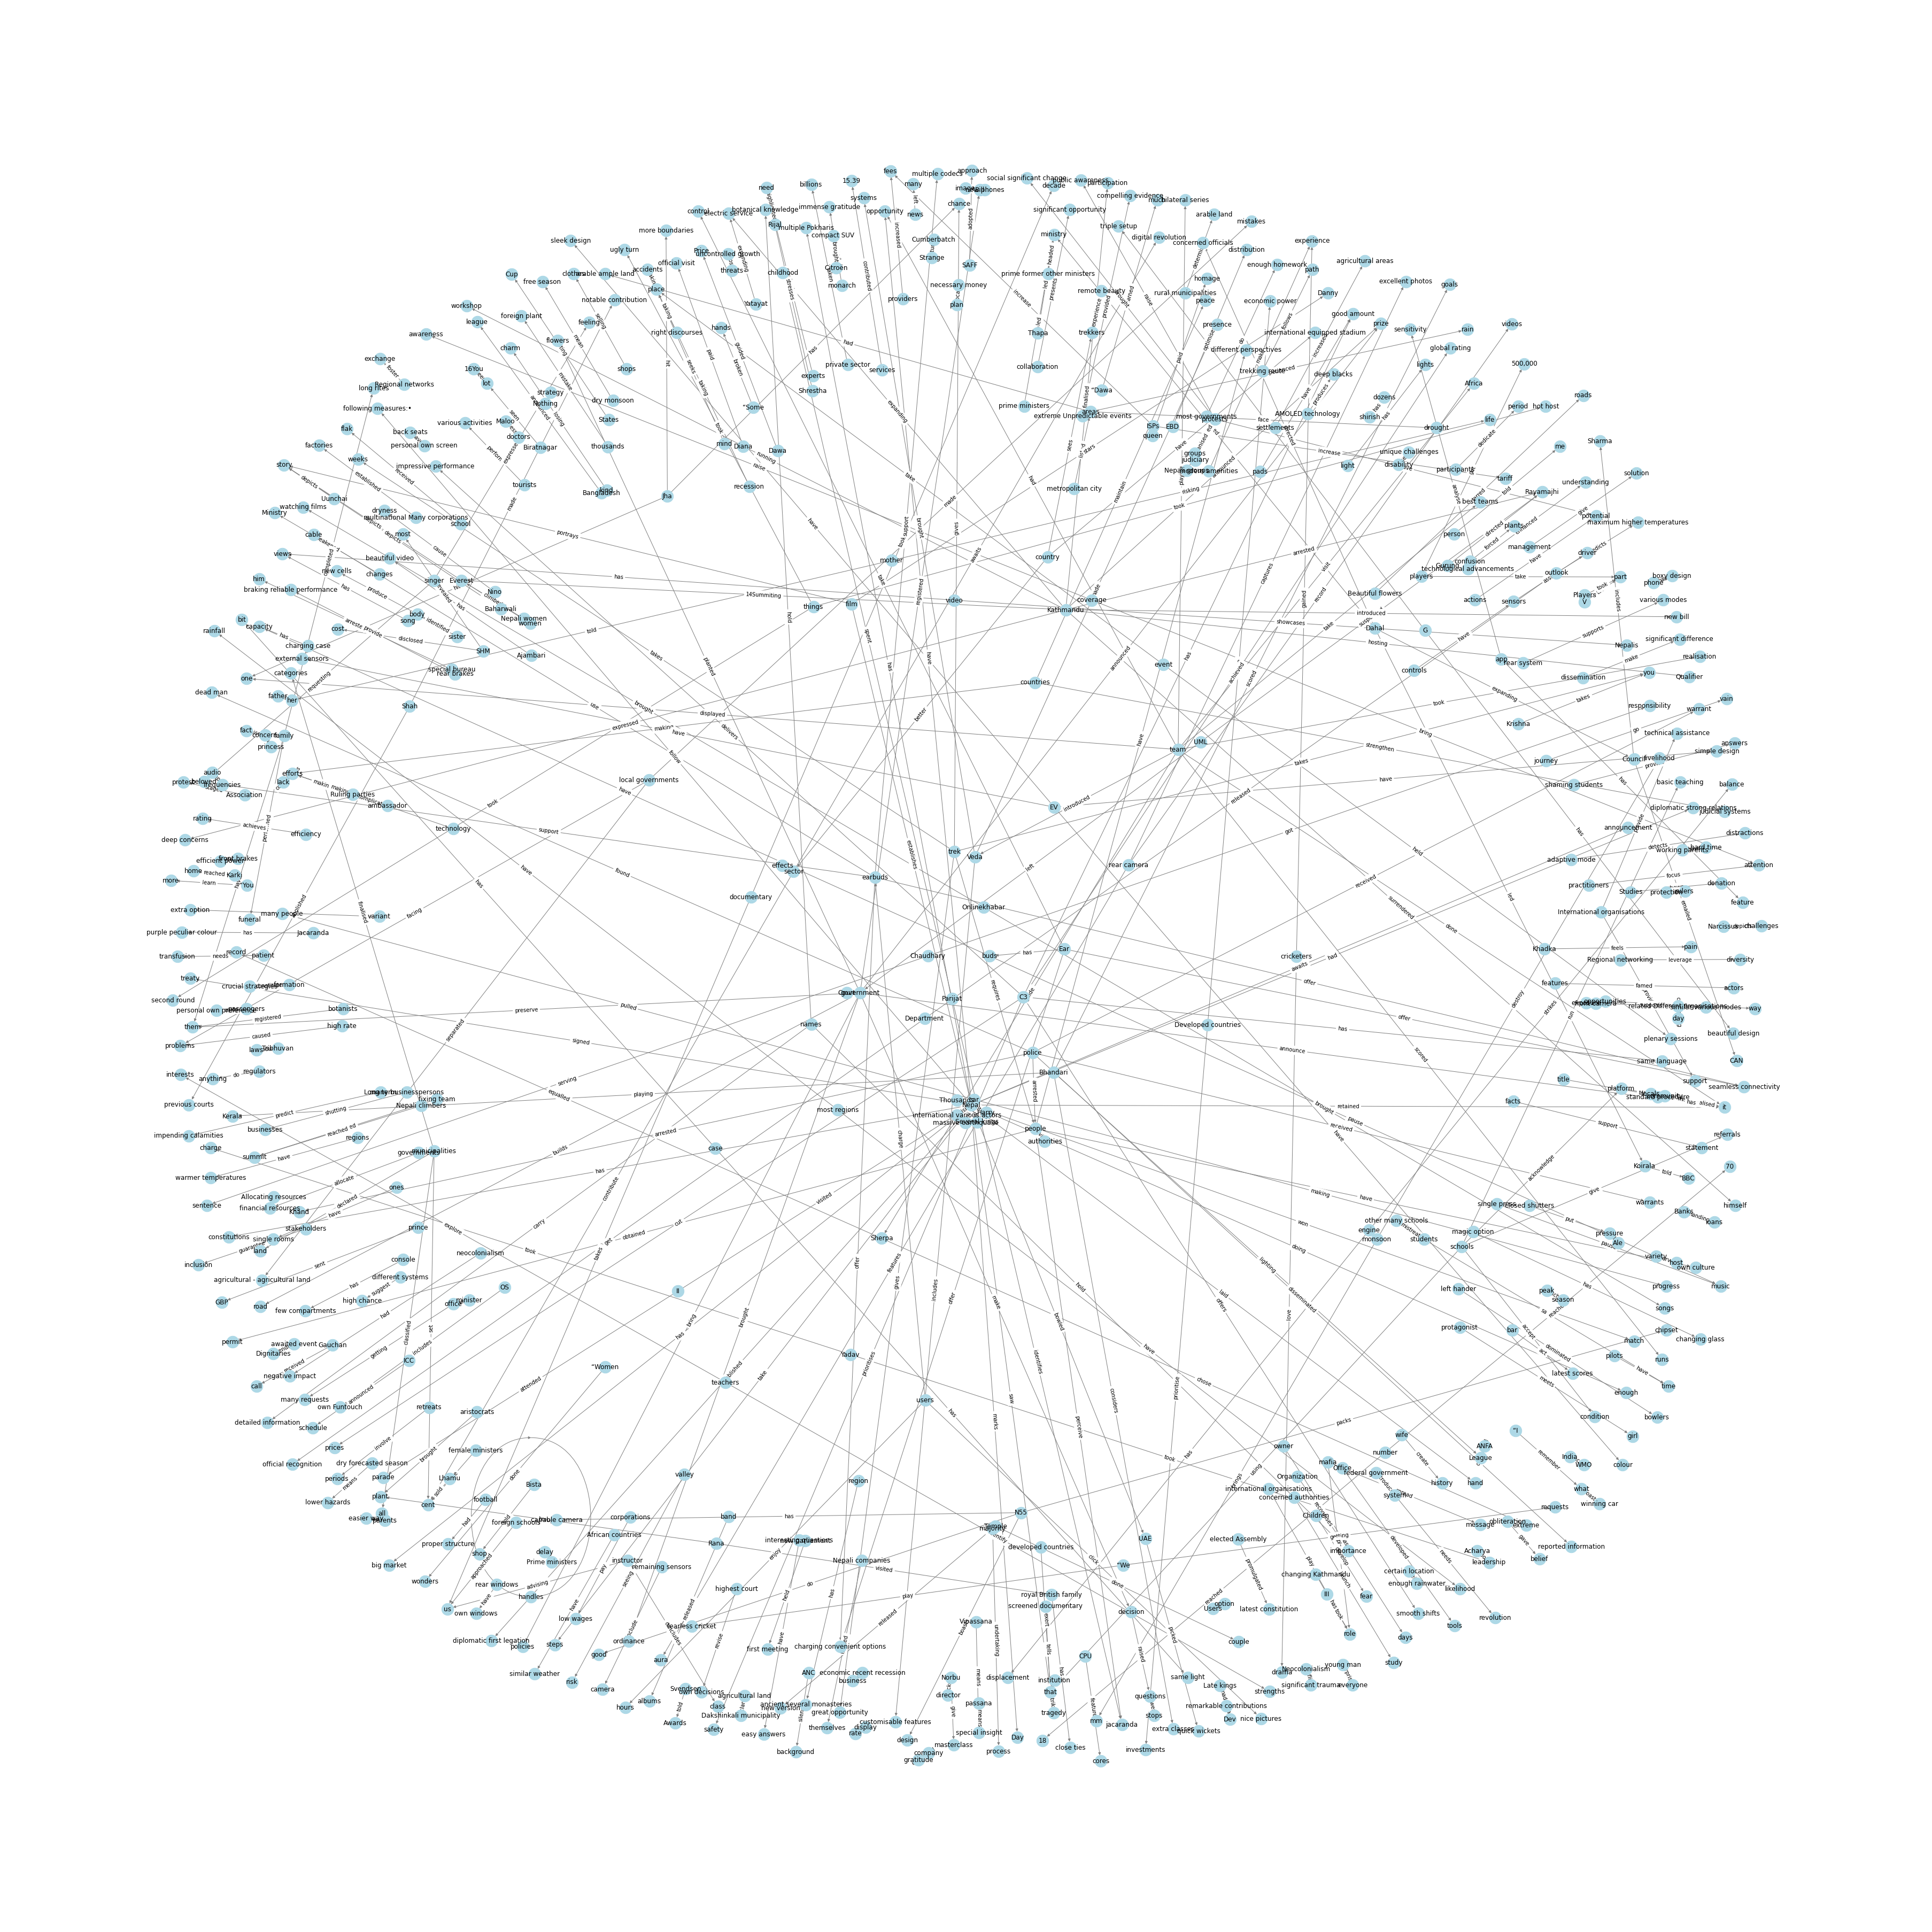

<Figure size 432x288 with 0 Axes>

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 4: Building a directed graph from the above data
graph = nx.DiGraph()
for edge in edges:
    graph.add_edge(edge[0], edge[1], relation=edge[2])

# Visualize the graph
plt.figure(figsize=(50, 50))
pos = nx.spring_layout(graph)  # Layout algorithm for node positioning
nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', arrows=True, node_size=500)
edge_labels = nx.get_edge_attributes(graph, 'relation')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.show()

# Save the graph as an image
plt.savefig('knowledge_graph.png')



In [37]:

# Save the graph as a GraphML file
nx.write_graphml(graph, "knowledge_graph.graphml")


# 5. Get an answer to the given question. Question sentences should be in natural language, follow the necessary steps to get the answer from the graph db.

In [39]:

def question_answer_about_relation(keywords):    
    # Step 1: Load the graph database
    graph = nx.read_graphml("knowledge_graph.graphml")

    # Step 2: Parse the question and extract relevant keywords or entities
    question = "What is the relationship between X and Y?"
    # Step 3: Query the graph database to retrieve relevant information
    answer = ""
    for keyword in keywords:
        if keyword in graph:
            neighbors = list(graph.neighbors(keyword))
            if neighbors:
                answer += f"{keyword} is related to "
                answer += ", ".join(neighbors)
                answer += ". \n"

    # Step 4: Extract the answer from the retrieved information
    if answer:
        answer = answer.strip()
    else:
        answer = "No information found for the given keywords."

    # Step 5: Display or return the answer
    print(answer)

keywords = ["Prachanda", "minister"]  # keywords extracted from the question
question_answer_about_relation(keywords)


minister is related to office.


In [57]:
def who_question_answer(key):
    # Step 1: load the graph database
    graph = nx.read_graphml("knowledge_graph.graphml")
    
    # Step 2: Parse the question and extract relevant keywords or entities
    question = "Who is X?"
    
    # Step 3: Query the graph database to retrieve relevant information
    answer = ""
    
    if key in graph:
        neighbors = list(graph.neighbors(key))
        if neighbors:
            answer += f"{key} is related to : "
            answer += ", ".join(neighbors)
    
    # Step 4: Extract the answer from the retrieved information
    if answer:
        answer = answer.strip()
    else:
        answer = "No information found for the given keywords."

    # Step 5: Display or return the answer
    print(answer)

key = "nepal"
who_question_answer(key)

No information found for the given keywords.


# (B) NER Technqiue for Entity Extraction

In [20]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string

# Load the English language model in spaCy
nlp = spacy.load('en_core_web_sm')

# Process the sentence
NER_text = text
doc = nlp(NER_text)

# Extract subject, object, and relationship
subject = ""
obj = ""
relationship = ""

# Define a set of punctuation marks
punctuations = string.punctuation

for sent in doc.sents:
    for token in sent:
        # Check if the token is a stop word or punctuation
        if token.text.lower() not in STOP_WORDS and token.text not in punctuations:
            # Check for named entities
            if token.ent_type_ == "PERSON" and token.dep_ == "nsubj" and token.head.pos_ == "VERB":
                subject = token.text
            elif token.ent_type_ == "ORG" and token.dep_ == "nsubj" and token.head.pos_ == "VERB":
                subject = token.text
            elif token.ent_type_ == "PERSON" and token.dep_ == "dobj" and token.head.pos_ == "VERB":
                obj = token.text
            elif token.ent_type_ == "ORG" and token.dep_ == "dobj" and token.head.pos_ == "VERB":
                obj = token.text
            elif token.dep_ == "ROOT" and token.pos_ == "VERB":
                relationship = token.text

    # Print the subject, object, and relationship
    print("Subject:", subject)
    print("Object:", obj)
    print("Relationship:", relationship)


Subject: 
Object: 
Relationship: 
Subject: 
Object: 
Relationship: 
Subject: 
Object: 
Relationship: tell
Subject: 
Object: 
Relationship: tell
Subject: 
Object: 
Relationship: tell
Subject: 
Object: 
Relationship: tell
Subject: 
Object: 
Relationship: awaits
Subject: 
Object: Veda
Relationship: introduced
Subject: 
Object: Veda
Relationship: save
Subject: Veda
Object: Veda
Relationship: mentored
Subject: Veda
Object: Veda
Relationship: mentored
Subject: Veda
Object: Veda
Relationship: mentored
Subject: Veda
Object: Veda
Relationship: mentored
Subject: Dwa
Object: Veda
Relationship: explains
Subject: Dwa
Object: Veda
Relationship: explains
Subject: Dwa
Object: Veda
Relationship: look
Subject: Dwa
Object: Veda
Relationship: look
Subject: Dwa
Object: Veda
Relationship: built
Subject: Dwa
Object: Veda
Relationship: adds
Subject: Dwa
Object: Veda
Relationship: adds
Subject: Dwa
Object: Veda
Relationship: realised
Subject: Pathak
Object: Veda
Relationship: says
Subject: Pathak
Object: Veda


In [ ]:
# # Step 5: Save the graph to a graph database (Neo4j)
# def save_graph_to_neo4j(graph, uri, username, password):
#     driver = GraphDatabase.driver(uri, auth=(username, password))
#     with driver.session() as session:
#         # Create nodes
#         for node in graph.nodes():
#             session.run("CREATE (:Entity {name: $name})", name=node)
        
#         # Create relationships
#         for edge in graph.edges():
#             subject, obj, relation = edge[0], edge[1], graph[edge[0]][edge[1]]['relation']
#             session.run(
#                 "MATCH (s:Entity {name: $subject}), (o:Entity {name: $obj})"
#                 "CREATE (s)-[:RELATIONSHIP {name: $relation}]->(o)",
#                 subject=subject, obj=obj, relation=relation
#             )

# # Save the graph to Neo4j
# neo4j_uri = "bolt://54.157.98.7:7687"
# neo4j_username = "your_username"
# neo4j_password = "your_password"
# save_graph_to_neo4j(graph, neo4j_uri, neo4j_username, neo4j_password)